 # **Course Info**

Name: Data Analytics

Code: WQD7003

Repo type: Group project

Project title: Stroke Prediction using Machine Learning

Member:

| No. | Name            |
| --- | ----------------|
| 1.  | Chan Tzyy Yan     
| 2.  | Choo En Ming     
| 3.  | Lee Jih Shian     
| 4.  | Min Kye Andy Lim   
| 5.  | Zhen Yang Tneu    

# CRISP-DM:
1. Business Understanding: Business Background, Business Objective & Success Criteria
2. Data Understanding: Data Collection, Data Description, Data Exploration, Data Quality Verification
3. Data Preparation: Cleaning & Imputation, Feature Selection & Engineering, Data Preprocessing
4. Modeling: Model Design - NB, XGB, RF, AdaBoost, SVM, KNN
5. Evaluation & Conclusion: Model Evaluation, Process Review

# 1. Business Understanding
## Business Background
CDM Healthcare Consultancy is a dynamic and innovative healthcare advisory firm dedicated to provide accurate and reliable healthcare advice to our patient. At CDM Healthcare Consultancy, we understand the critical importance of accurate healthcare advice in improving patient outcomes and promoting overall well-being.
<br>As a leading market player in healthcare and medical industry, we provide our patient with the most current and comprehensive advice, tailored to their unique circumstances. Whether it's preventive care, disease management, treatment options, or lifestyle modifications, we strive to empower our clients with the knowledge and guidance they need to make informed healthcare decisions.

## Business Objective & Success Criteria
Our company understands the critical importance of early detection and prevention when it comes to strokes, which are a leading cause of mortality and long-term disability worldwide.
<br>Therefore, CDM Healthcare Consultancy leverages its expertise in healthcare and data analysis to **develop a stroke prediction model** to assess an individual's risk of experiencing a stroke.
<br>By analyzing large datasets and identifying patterns and risk factors, our model can provide valuable insights to healthcare providers, enabling them to take proactive measures and provide targeted interventions to high-risk individuals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, \
  ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, \
  auc, precision_recall_curve, average_precision_score, make_scorer, balanced_accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.metrics import geometric_mean_score

In [2]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# 2. Data Understanding
In order to develop a stroke prediction model, CDM Healthcare Consultancy obtained a dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
<br>First and foremost, it is started with Exploratory Data Analysis (EDA) for better understanding on the dataset, identifying any data quality issues, and discovering initial insights.

In [3]:
data.shape

(5110, 12)

To determine whether there is any class imbalance problem, the relative frequency of `stroke` variable is displayed as follows:

In [4]:
data.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

This indicates that the majority of the observations (95.13%) were patients that does not have stroke, while a small proportion (4.87%) has stroke. This results in an imbalance ratio of 19.5.

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The summary statistics provides an overview of the distribution, central tendency, and variability of the numerical variables in the dataset.
<br>This could help to identify any possible outliers, assess the range of values, and understand the general patterns within the data.

## Distribution Plots of Continuous Variables

In [6]:
# set plot theme
sns.set_theme(style="whitegrid")

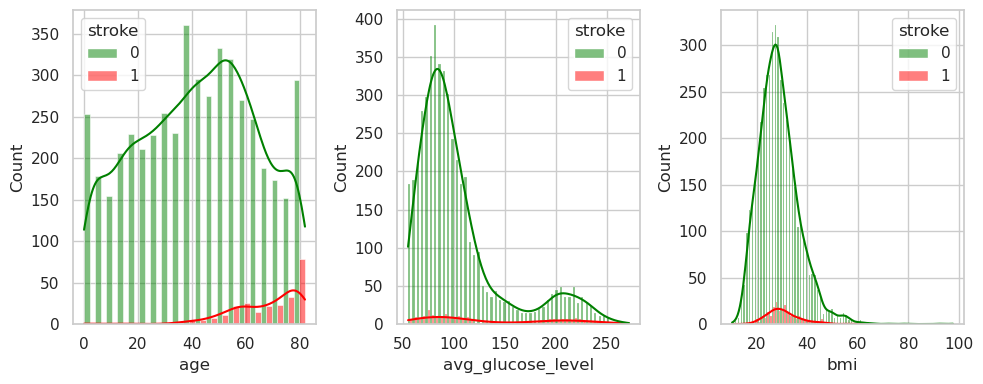

In [7]:
# plot distribution of continuous features
numerics = data.select_dtypes("float")
cols = numerics.columns
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=len(cols))

custom_palette = ["green", "red"]

for n in range(len(cols)):
    sns.histplot(data=data, x=cols[n], hue='stroke', multiple='dodge', kde=True, ax=axs[n], palette=custom_palette)
plt.tight_layout()

# fig.savefig("fig0.jpg", dpi=300)

`Stroke` occurred more frequently in patients above 40 years old, where the occurrence increased with age

## Scatterplots of Continuous Variables


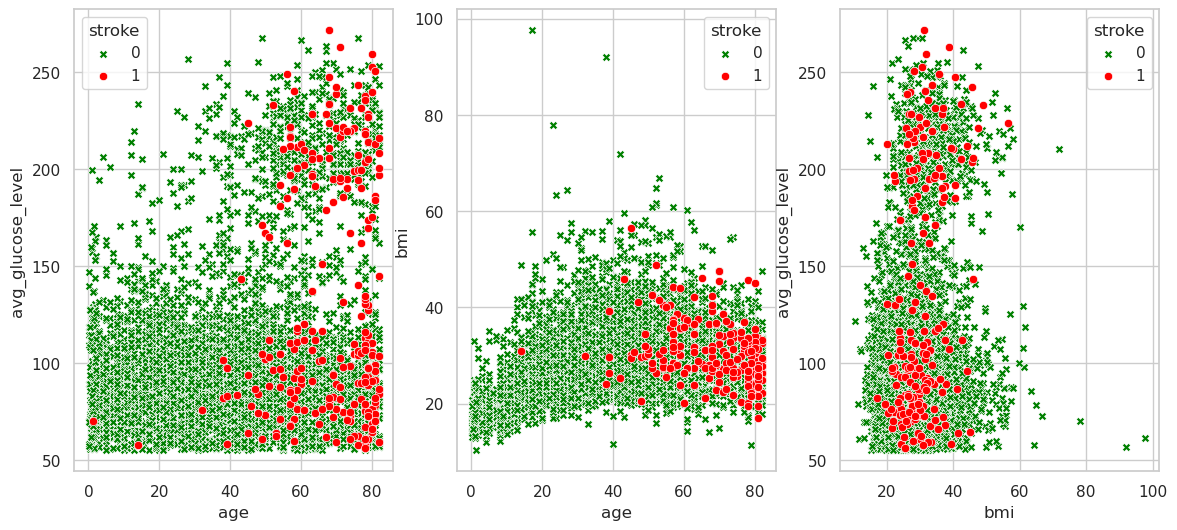

In [8]:
# plot relationship between bmi, age, glucose and stroke
fig, axs = plt.subplots(figsize=(14, 6), nrows=1, ncols=3)

sns.scatterplot(data=data[data["stroke"] == 0], x="age", y="avg_glucose_level", color="green", marker="X", label="0", sizes={"X": 50}, ax=axs[0])
sns.scatterplot(data=data[data["stroke"] == 1], x="age", y="avg_glucose_level", color="red", marker="o", label="1", sizes={"o": 100}, ax=axs[0])
axs[0].legend(title="stroke")

sns.scatterplot(data=data[data["stroke"] == 0], x="age", y="bmi", color="green", marker="X", label="0", sizes={"X": 50}, ax=axs[1])
sns.scatterplot(data=data[data["stroke"] == 1], x="age", y="bmi", color="red", marker="o", label="1", sizes={"o": 100}, ax=axs[1])
axs[1].legend(title="stroke")

sns.scatterplot(data=data[data["stroke"] == 0], x="bmi", y="avg_glucose_level", color="green", marker="X", label="0", sizes={"X": 50}, ax=axs[2])
sns.scatterplot(data=data[data["stroke"] == 1], x="bmi", y="avg_glucose_level", color="red", marker="o", label="1", sizes={"o": 100}, ax=axs[2])
axs[2].legend(title="stroke")

# fig.savefig("fig6.jpg", dpi=300)

Again, the scatterplots show that the `stroke` occurrence was distributed more towards older patients.

## Box Plots
Box plot is used to:
- Visualise the data distribution to understand the data central tendency, spread and skewness
- Identify outliers
- Communicate data summary

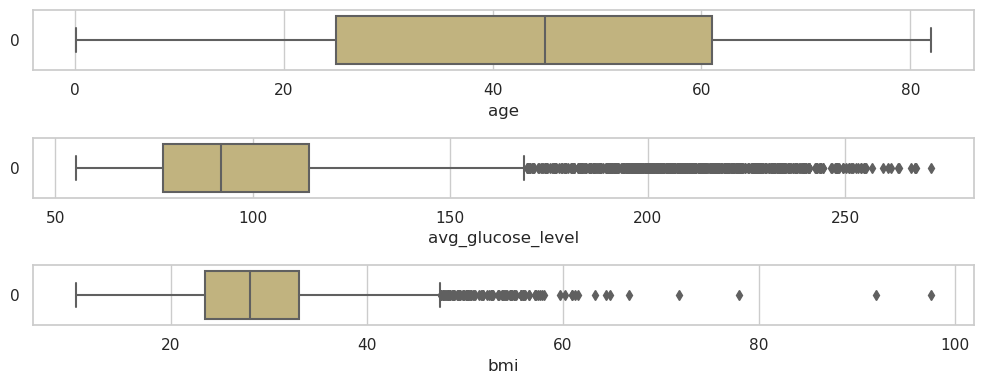

In [9]:
numerics = data.select_dtypes("float")
cols = numerics.columns
fig, axs = plt.subplots(figsize=(10, 4), nrows=len(cols), ncols=1)

for n in range(len(cols)):
    sns.boxplot(data=numerics[cols[n]], orient="h", ax=axs[n], palette=["y"])
    axs[n].set_xlabel(cols[n])
plt.tight_layout()

# fig.savefig("fig2.jpg", dpi=300)

`BMI` and `Average Glucose Level` had outliers, however, the outliers were not be removed as they were not deemed to be erroneous.

## Distribution of Categorical Variables

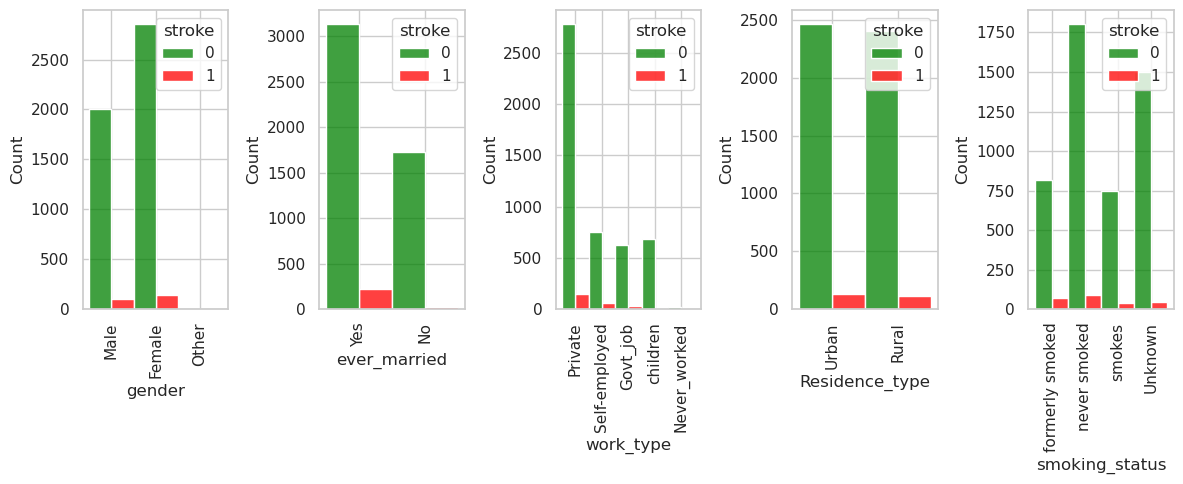

In [10]:
cats = data.select_dtypes("object")
cols = cats.columns

fig1, axs1 = plt.subplots(figsize=(12, 5), nrows=1, ncols=5)
for n in range(len(cols)):
    sns.histplot(data=data, x=cols[n], hue='stroke', ax=axs1[n], multiple='dodge', palette=custom_palette)
    for tick in axs1[n].get_xticklabels():
      tick.set_rotation(90)
plt.tight_layout()

# fig1.savefig("fig4.jpg", dpi=300)

`Gender` value of *other* will be removed

## Correlation Plot

/tmp/ipykernel_32/3761241065.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=palette, annot=True)


<Axes: >

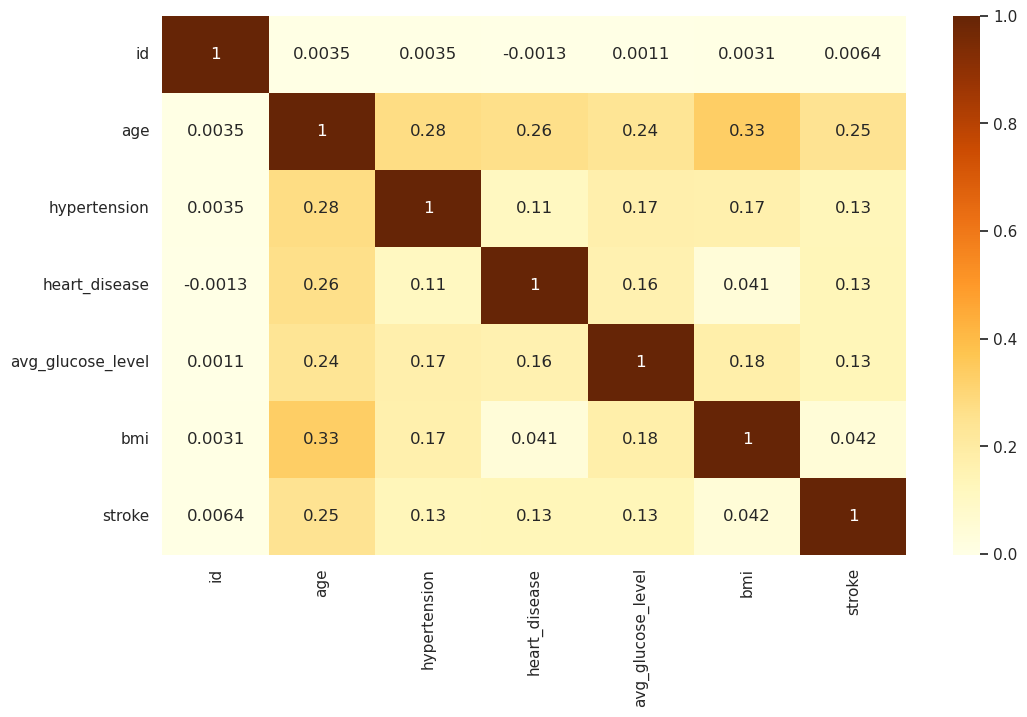

In [11]:
palette = sns.color_palette("YlOrBr", as_cmap=True)
fig2, axs2 = plt.subplots(figsize=(12, 7))
# to_plot = data.drop(columns=["id"])
sns.heatmap(data.corr(), cmap=palette, annot=True)
# fig2.savefig("fig3.jpg", dpi=300)

Consistent with the previous plots and interpretation. `Stroke` occurrence had the highest correlation with age.
Based on the EDA completed, we suggest our health provider to bear in mind that elderly has higher risk of getting stroke compare to younger.

# 3. Data Preparation
1. Data Cleaning
2. Data Preprocessing
3. Missing Value Imputation
3. Feature Selection & Engineering

## Data Cleaning:
Remove row where `gender` was *other*
<br>Make `id` column as index

In [12]:
data.drop(data[data.gender=="Other"].index, inplace=True)
data.set_index("id", inplace=True)

In [13]:
print(data.info())
print("*" * 100); print("Total Missing Values by Attributes"); print("*" * 100)
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB
None
****************************************************************************************************
Total Missing Values by Attributes
************************************************************

Categorical data type is currently `object`, however it will be encoded.
<br>There were 201 missing values in the `bmi` attribute. Imputation will be applied to fill in the missing values.

In [14]:
object_columns = data.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = data[col].unique()
    print(f"Unique values for {col}:")
    print(unique_values)
    print("*"*100)

Unique values for gender:
['Male' 'Female']
****************************************************************************************************
Unique values for ever_married:
['Yes' 'No']
****************************************************************************************************
Unique values for work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
****************************************************************************************************
Unique values for Residence_type:
['Urban' 'Rural']
****************************************************************************************************
Unique values for smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
****************************************************************************************************


Attributes having more than 2 unique values will be encoded by one-hot encoding technique

In [15]:
# Map values for gender, ever_married, and Residence_type
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0}).astype(int)
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0}).astype(int)
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural': 0}).astype(int)

In [16]:
# one-hot encoding
object_columns = data.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(data, columns=object_columns)

In [17]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


## Imputation
An experiment was conducted to determine the best method to impute the missing values in the `bmi` attribute.
<br>Three imputation methods were evaluated:
- Model-Based Imputation: Random Forest (Classification Method)
- Mean Imputation: works well when data follows a normal distribution
- Median Imputation: not affected by extreme values

Select rows that have no missing values, randomly masked the `bmi` value, followed by splitting into training and testing sets to determine the best imputation methods

In [18]:
df_imput = df_encoded[df_encoded.notna().all(axis=1)]

np.random.seed(123)

# randomly masked 10% of the data as missing values
mask = np.random.rand(len(df_imput)) < 0.1
df_imput.loc[:, 'bmi_missing'] = df_imput['bmi'].copy()
df_imput.loc[mask, 'bmi_missing'] = np.nan

df_imput.isna().sum()

/tmp/ipykernel_32/865615406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput.loc[:, 'bmi_missing'] = df_imput['bmi'].copy()


gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                                 0
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
bmi_missing                       515
dtype: int64

In [19]:
df_imput_rf = df_imput.copy() # for imputation with random forest
df_imput_mean = df_imput.copy() # for imputation with mean
df_imput_median = df_imput.copy() # for imputation with median

### Model-Based Imputation (Random Forest)

In [20]:
# split into train (without missing values) and test (with missing values)
df_imput_rf2 = df_imput_rf.drop("bmi", axis=1)
train_df_imput_rf = df_imput_rf2[df_imput_rf2['bmi_missing'].notnull()]
test_df_imput_rf = df_imput_rf2[df_imput_rf2['bmi_missing'].isnull()]

# separate the target variable and the features in the training data
train_labels = train_df_imput_rf['bmi_missing']
train_features = train_df_imput_rf.drop('bmi_missing', axis = 1)

# imputation with random forest model on the training data
randforest = RandomForestRegressor(n_estimators=100, random_state = 0)
randforest.fit(train_features, train_labels)
test_features = test_df_imput_rf.drop('bmi_missing', axis = 1)
imputed_bmi_randforest = randforest.predict(test_features)
df_imput_rf2.loc[df_imput_rf2['bmi_missing'].isnull(), 'bmi_missing'] = imputed_bmi_randforest

In [21]:
# get mean square error
index_na = df_imput.loc[df_imput['bmi_missing'].isnull()].index
mse_randforest = mean_squared_error(df_imput.loc[index_na, 'bmi'], df_imput_rf2.loc[index_na, 'bmi_missing'])
print(mse_randforest)

48.06188897475728


### Imputation with Mean

In [22]:
df_imput_mean["bmi_missing"] = df_imput_mean["bmi_missing"].fillna(df_imput_mean["bmi_missing"].mean())

In [23]:
# get mean square error
mse_meanimput = mean_squared_error(df_imput.loc[index_na, 'bmi'], df_imput_mean.loc[index_na, 'bmi_missing'])
print(mse_meanimput)

58.21006931486154


### Imputation with Median

In [24]:
df_imput_median["bmi_missing"] = df_imput_median["bmi_missing"].fillna(df_imput_median["bmi_missing"].median())

In [25]:
# get mean square error
mse_medianimput = mean_squared_error(df_imput.loc[index_na, 'bmi'], df_imput_median.loc[index_na, 'bmi_missing'])
print(mse_medianimput)

58.50347572815534


### MSE Comparison for All Three Imputation Methods

In [26]:
mse_dict = {'Model-Based Imputation': mse_randforest, 'Mean Imputation': mse_meanimput, 'Median Imputation': mse_medianimput}
mse_df = pd.DataFrame(list(mse_dict.items()), columns = ['Method', 'MSE'])
mse_df['Ranking'] = mse_df['MSE'].rank().astype(int)
print(mse_df)

                   Method        MSE  Ranking
0  Model-Based Imputation  48.061889        1
1         Mean Imputation  58.210069        2
2       Median Imputation  58.503476        3


In [27]:
df_encoded.bmi.describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

Model-Based Imputation method has the lowest MSE, hence the missing values will be inputed by this method

### Create Random Forests Imputer

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create Imputer
class RandomForestImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column):
        self.target_column = target_column
        self.model = RandomForestRegressor(n_estimators=100, random_state=0)

    # Define fit method
    def fit(self, X, y=None):
        self.features = X.drop(self.target_column, axis=1)
        self.target = X[self.target_column]

        mask = self.target.isna()
        train_features = self.features[~mask]
        train_target = self.target[~mask]

        self.model.fit(train_features, train_target)
        return self

    # Define transform method
    def transform(self, X):
        X_copy = X.copy()
        features = X_copy.drop(self.target_column, axis=1)
        target = X_copy[self.target_column]

        mask = target.isna()
        test_features = features[mask]

        if sum(mask) > 0:
            imputed_values = self.model.predict(test_features)
            X_copy.loc[mask, self.target_column] = imputed_values

        return X_copy

# Test imputer
imputer = RandomForestImputer("bmi")
imputer.fit(df_encoded)
x = imputer.transform(df_encoded)

In [29]:
# Compare statistic of bmi before and after imputatation
print("Before Imputation")
print(df_encoded.bmi.describe())
print("\n")
print("Post Imputation")
print(x.bmi.describe())

Before Imputation
count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64


Post Imputation
count    5109.000000
mean       28.963931
std         7.775167
min        10.300000
25%        23.700000
50%        28.282000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


Although the actual imputation will only be conducted in the pipeline at a later stage, we run a test to check the mean, median and other statistics of the data before and after imputation to ensure imputation does not alter the data distribution.

----

### Feature Engineering
Transform the feature `avg_glucose_level` into high and normal blood sugar
<br>high blood sugar (> 126mg/dL) = 1
<br>normal blood sugar (<= 126mg/dL) = 0

In [30]:
# Transform avg_glucose_level
df_encoded["avg_glucose_level"] = df_encoded["avg_glucose_level"].apply(lambda x:1 if x > 126 else 0)

In [31]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,1,67.0,0,1,1,1,1,36.6,1,0,0,1,0,0,0,1,0,0
51676,0,61.0,0,0,1,0,1,NaN,1,0,0,0,1,0,0,0,1,0
31112,1,80.0,0,1,1,0,0,32.5,1,0,0,1,0,0,0,0,1,0
60182,0,49.0,0,0,1,1,1,34.4,1,0,0,1,0,0,0,0,0,1
1665,0,79.0,1,0,1,0,1,24.0,1,0,0,0,1,0,0,0,1,0


# 3. Modelling

Firstly, "Stroke" was identified as the target variable that to be predicted in the model.

In [32]:
y = df_encoded["stroke"]
x = df_encoded.drop(columns="stroke")

Split 70% into training set and 30% into testing set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Initial Modeling with Default Parameters
Tested the performance of various models with default settings.

In [34]:
# Initiate imputer and SMOTE
RF_impute = RandomForestImputer("bmi")
sm = SMOTE(random_state=0)

# Initiate models
models = {}
models["NB"] = GaussianNB()
models["XGB"] = XGBClassifier(eval_metric="auc")
models["RF"] = RandomForestClassifier()
models["ADA"] = AdaBoostClassifier()
models["SVM"] = SVC(probability=True)
models["KNN"] = KNeighborsClassifier()

# Run initial test
for model in models:
  pipe = Pipeline([("impute", RF_impute), ("SMOTE", sm), (model, models[model])])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(model)
  print(f"F1: {f1_score(y_test, y_pred)}")
  print(f"Gmean: {geometric_mean_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))

NB
F1: 0.11940298507462685
Gmean: 0.5508496358502303
              precision    recall  f1-score   support

           0       0.98      0.36      0.53      1457
           1       0.06      0.84      0.12        76

    accuracy                           0.38      1533
   macro avg       0.52      0.60      0.32      1533
weighted avg       0.93      0.38      0.51      1533

XGB
F1: 0.06299212598425197
Gmean: 0.2256851481114751
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.08      0.05      0.06        76

    accuracy                           0.92      1533
   macro avg       0.51      0.51      0.51      1533
weighted avg       0.91      0.92      0.92      1533

RF
F1: 0.07142857142857142
Gmean: 0.22688242520337124
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1457
           1       0.11      0.05      0.07        76

    accuracy         

We see that some models have a lower F1-Score than the baseline model (Naive Bayes). We will proceed with model tuning in the next to improve this.

----

## Model Tuning
Important hyperparameters for each models are set and the best combination is found using GridSearchCV on the training set. The test set is saved for final evaluation.

In [35]:
# Define helper function
def evaluate(model):

  # Fit model
  model.fit(X_train, y_train)

  # Print GridSearchCV results
  print(model.best_params_)

  # Test model on test dataset
  y_pred = model.predict(X_test)
  print(f"F1: {f1_score(y_test, y_pred)}")
  print(f"Gmean: {geometric_mean_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))

  # Returns model with best params and best params
  return (model.best_estimator_, model.best_params_)

# Dictionary to store models with best parameters
trained_models = {}
best_params = {}

# Create param grids
params = {}
param_grid_ada = {
    'ADA__n_estimators': [50, 100, 200],
    'ADA__learning_rate': [0.01, 0.1, 1.0]
}
params["ADA"] = param_grid_ada

param_grid_xgb = {
    'XGB__learning_rate': [0.01, 0.1, 0.3],
    'XGB__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()] # scale_pos_weight value is the imbalance ratio
}
params["XGB"] = param_grid_xgb

param_grid_svm = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01],
}
params["SVM"] = param_grid_svm

param_grid_knn = {
    'KNN__n_neighbors': [3, 7, 9],
    'KNN__weights': ['uniform', 'distance'],
    'KNN__metric': ['euclidean', 'manhattan']
}
params["KNN"] = param_grid_knn

param_grid_rf = {
    'RF__n_estimators': [100, 200, 500],
    'RF__max_depth': [10, 20, 30],
}
params["RF"] = param_grid_rf

del models["NB"]

# Evaluate each model with GridSearchCV with 10-fold cross-validation
for model in models:
  # Create pipeline
  pipe = Pipeline([("impute", RF_impute), ("SMOTE", sm), (model, models[model])])

  # Perform grid search
  scorer = make_scorer(geometric_mean_score)
  gs = GridSearchCV(estimator=pipe, param_grid=params[model], scoring=scorer, cv=10, refit=True)

  # Save models with best parameters
  (trained_models[model], best_params[model]) = evaluate(gs)

{'XGB__learning_rate': 0.01, 'XGB__scale_pos_weight': 19.670520231213874}
F1: 0.17273954116059378
Gmean: 0.7033804566205765
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1457
           1       0.10      0.84      0.17        76

    accuracy                           0.60      1533
   macro avg       0.54      0.71      0.45      1533
weighted avg       0.94      0.60      0.71      1533

{'RF__max_depth': 10, 'RF__n_estimators': 200}
F1: 0.13414634146341464
Gmean: 0.37025362034747744
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1457
           1       0.12      0.14      0.13        76

    accuracy                           0.91      1533
   macro avg       0.54      0.55      0.54      1533
weighted avg       0.91      0.91      0.91      1533

{'ADA__learning_rate': 0.01, 'ADA__n_estimators': 200}
F1: 0.2040133779264214
Gmean: 0.7407267261240781
              precis

With the best parameters found for each model, we proceed to retrain each model using the best parameters on the entire training set then evaluate its final performance on the test set.

A final evaluation of each model's performance was also obtained by testing the model on the entire dataset with 10-fold CV.

----

In [36]:
# Retrain each tuned model on the entire training set then evaluate on test set
results = []
for model in trained_models:

  this_model = {}
  this_model["Model"] = model
  this_model["Best Param"] = best_params[model]

  # Conduct 10-fold cross validation on entire dataset and save results
  current = trained_models[model]
  this_model["F1_Cross_Val"] = cross_val_score(current, x, y, scoring="f1", cv=10).mean()
  this_model["Gmean_Cross_Val"] = cross_val_score(current, x, y, scoring=make_scorer(geometric_mean_score), cv=10).mean()

  # Calculate performance of models on train and test data
  current = trained_models[model]
  current.fit(X_train, y_train)
  y_pred_test = current.predict(X_test)
  y_pred_train = current.predict(X_train)

  # Save results
  this_model["F1_Test"] = f1_score(y_test, y_pred_test)
  this_model["Gmean_Test"] = geometric_mean_score(y_test, y_pred_test, pos_label=1, average="binary")
  this_model["F1_Train"] = f1_score(y_train, y_pred_train)
  this_model["Gmean_Train"] = geometric_mean_score(y_train, y_pred_train, pos_label=1, average="binary")
  results.append(this_model)

## Selecting the Best Model
The following metrics were used to evaluate the performance of the models. Typical evaluation metrics such as accuracy were not used as it does not properly represent the ability of the classifier to make the correct predictions in an imbalanced scenario.

1. `G-mean` = sqrt(`Recall` * `Specificity`) --> Gives a balanced metric representing the ability of the model to correctly classify both classes.

2. `F1-Score` = 2 * (`Precision` * `Recall`) / (`Precision` + `Recall`) --> Similar but has a higher emphasis on False Positives

3. `AUC` --> Calculates the area under the receiver operating characteristics (ROC) curve to give a balanced summary of model performance. The ROC curve plots the True Positive Rate vs the False Positive Rate across the entire decision threshold.

In this case, a False Positive would be a predicting that a healthy patient is likely to have a stroke while a False Negative would be predicting that a patient who is about to have a stroke is healthy. Since both cases would represent a bad outcome for patients and doctors, we focus on Gmean which gives a more balanced metric that represents both cases, as well as AUC metric and the shape of the ROC curve.

**Results Summary**
1. After tuning, all models performed better than the baseline Naive Bayes [F1:0.119, Gmean:0.551] model except the Random Forests model.
2. From the results table below, the model with the best fully cross validated `Gmean` score is SVM, followed closely by AdaBoost.
3. However, as we see in the next section, AdaBoost has a higher AUC value and performs better across all decision thresholds.
4. We can thus conclude that **AdaBoost** is the best model, as it is effective over all decision thresholds. The correct decision threshold that balances False Positives and False Negatives would have to be discussed with healthcare professionals.
6. We also calculated the performance of each model on the training set to check if the model is overfitting. From the results, it can be seen that the degree of overfitting is not extreme.


In [37]:
# Create results df
pd.set_option('max_colwidth', None)
results_df = pd.DataFrame(results)
results_df

,Model,Best Param,F1_Cross_Val,Gmean_Cross_Val,F1_Test,Gmean_Test,F1_Train,Gmean_Train
0,XGB,"{'XGB__learning_rate': 0.01, 'XGB__scale_pos_weight': 19.670520231213874}",0.162307,0.689130,0.172740,0.703380,0.204301,0.775968
1,RF,"{'RF__max_depth': 10, 'RF__n_estimators': 200}",0.146859,0.391970,0.137500,0.370790,0.619855,0.845892
2,ADA,"{'ADA__learning_rate': 0.01, 'ADA__n_estimators': 200}",0.204563,0.751565,0.204013,0.740727,0.212364,0.762920
3,SVM,"{'SVM__C': 0.1, 'SVM__gamma': 0.01}",0.209199,0.758077,0.201342,0.734999,0.223694,0.782078
4,KNN,"{'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}",0.189847,0.668362,0.204082,0.679751,0.321127,0.882619


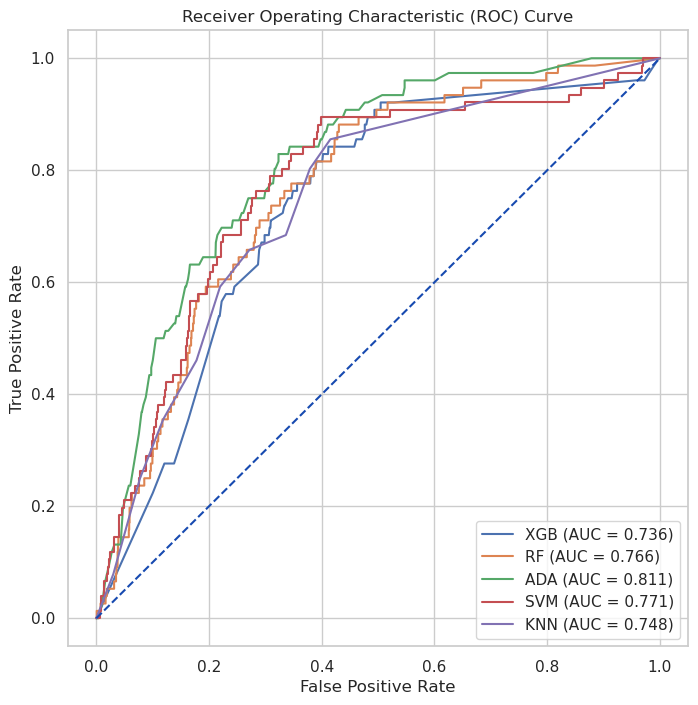

In [38]:
# Plot ROC Curves
plt.figure(figsize=(8, 8))
plot_models = trained_models

for model in trained_models:

  # Fit model
  current = trained_models[model]
  current.fit(X_train, y_train)

  # Predict probabilities and plot
  y_prob = current.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label="{} (AUC = {:.3f})".format(model, roc_auc))

plt.plot([0, 1], [0, 1], linestyle="--", color="#174ab0")
plt.legend(loc="lower right")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Feature Importances
Both XGBoost and AdaBoost are ensemble boosting algorithms that combine many individual trees to arrive at the final result. Feature importance gives a summary of how each feature contributes across all trees in the model. More important features are used more frequently and/or result in larger improvements to the model's predictions. By plotting feature importance, we can understand which features are most influential in our model.

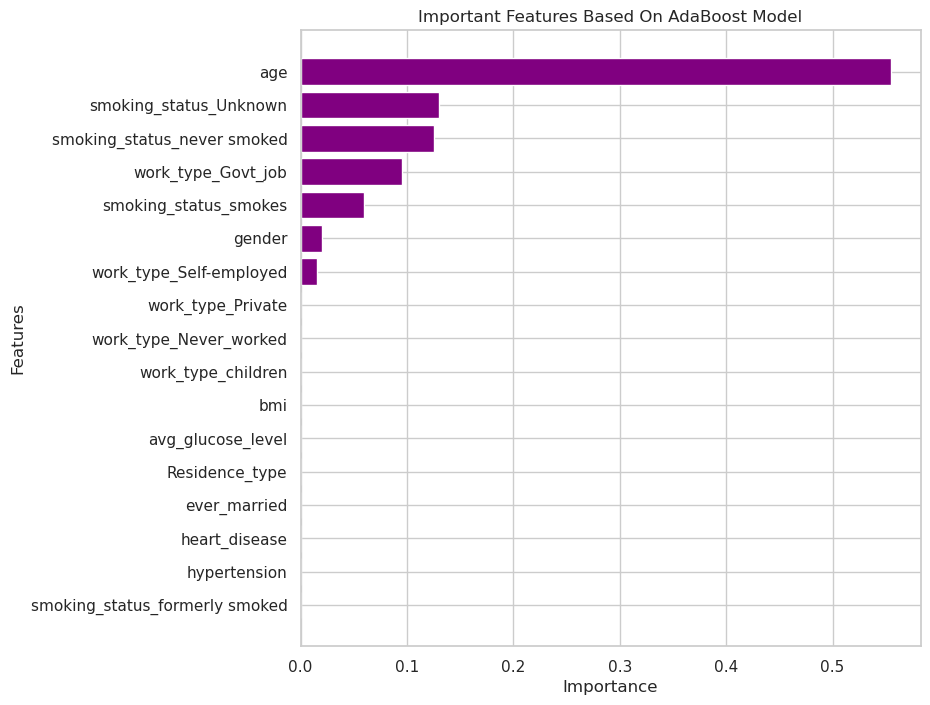

In [39]:
# Plot feature importances for AdaBoost
ada = trained_models["ADA"]
ada.fit(X_train, y_train)
feature_importance = ada.named_steps["ADA"].feature_importances_
feature_importance_table = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_table = feature_importance_table.sort_values(by = "Importance", ascending = True)

plt.figure(figsize = (8, 8))
plt.barh(feature_importance_table["Feature"], feature_importance_table["Importance"], color = "purple")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Important Features Based On AdaBoost Model")
plt.show()

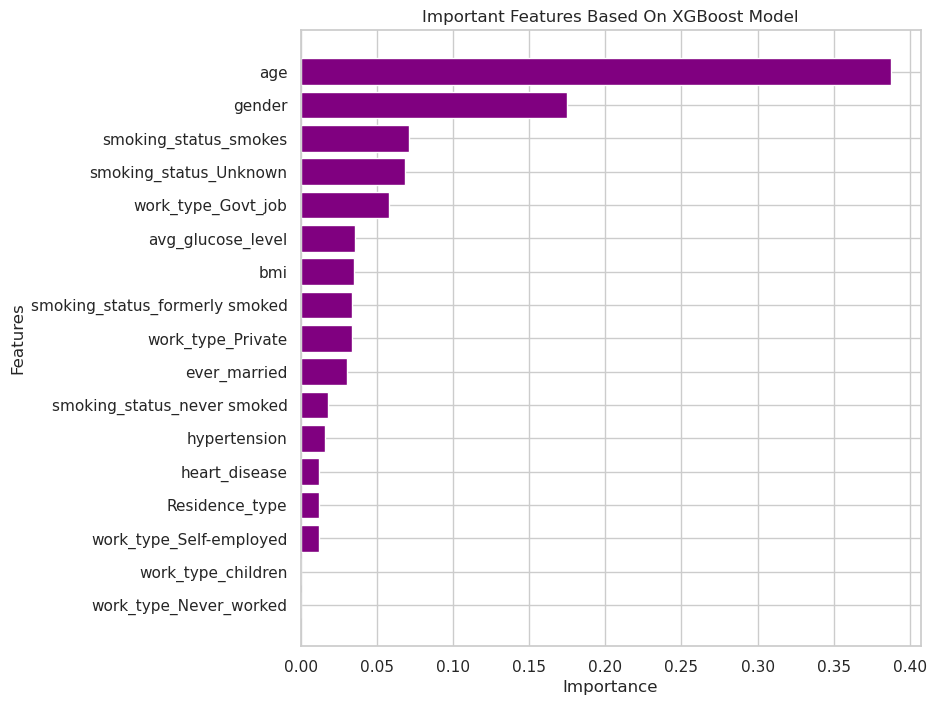

In [40]:
# Plot feature importances for XGBoost
xgb = trained_models["XGB"]
xgb.fit(X_train, y_train)
feature_importance = xgb.named_steps["XGB"].feature_importances_
feature_importance_table = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_table = feature_importance_table.sort_values(by = "Importance", ascending = True)

plt.figure(figsize = (8, 8))
plt.barh(feature_importance_table["Feature"], feature_importance_table["Importance"], color = "purple")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Important Features Based On XGBoost Model")
plt.show()

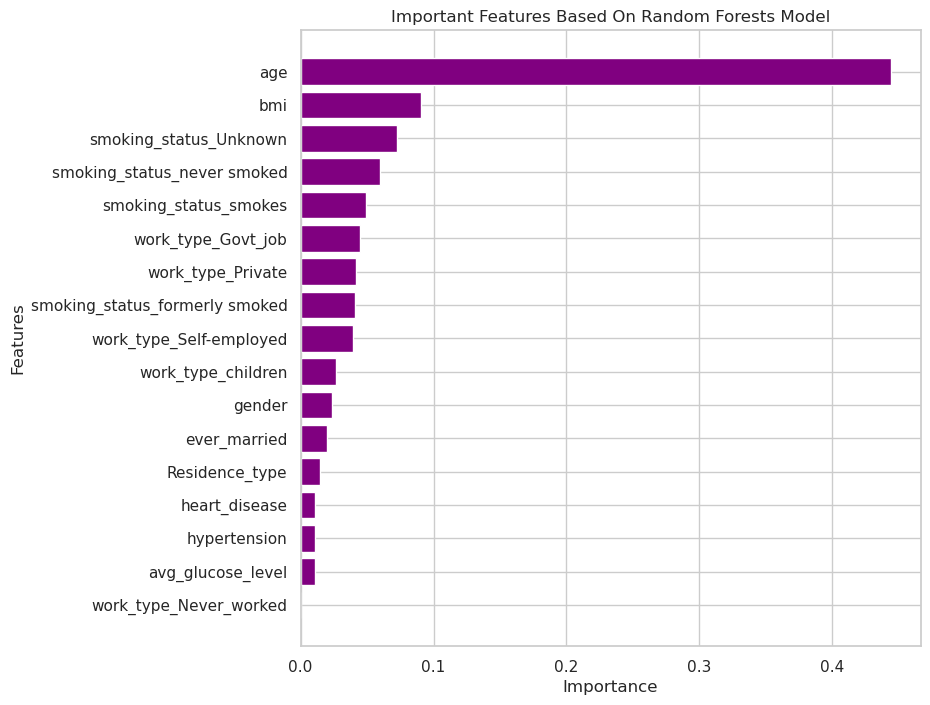

In [41]:
# Plot feature importances for Random Forests
rf = RandomForestClassifier(max_depth=10, n_estimators=200)
pipe = Pipeline([("impute", RF_impute), ("SMOTE", sm), ("RF", rf)])
pipe.fit(X_train, y_train)
feature_importance = pipe.named_steps["RF"].feature_importances_
feature_importance_table = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_table = feature_importance_table.sort_values(by = "Importance", ascending = True)

plt.figure(figsize = (8, 8))
plt.barh(feature_importance_table["Feature"], feature_importance_table["Importance"], color = "purple")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Important Features Based On Random Forests Model")
plt.show()

Interestingly, we see that XGBoost places importance on more features while AdaBoost considers less features, this could be due to differences in the how the objective function of each model builds and adds each subsequent tree. The most important features from the Random Forest model also differed slightly as Random Forests also combines individual trees differently, adding randomness in the construction of each tree and then taking a majority vote to get the final result.

That said, all models identify `age` as the most important features in predicting stroke occurrence. This is consistent with what we observed in the EDA phase, which is that stroke occurrence is highly correlated with `age`.

# Conclusion
In conclusion, based on our evaluation, the **AdaBoost** model emerged as the most effective in predicting strokes, aligning with our business objective of enhancing stroke prediction capabilities. With its superior performance, we plan to deploy this model in real-life scenarios, incorporating it into routine business operations to improve stroke risk assessment.

Through this project, we have successfully achieved our data mining goals, specifically identifying key variables that are crucial in detecting strokes, such as the importance are in the order: `age`, `smoking_status`.

With this knowledge, our healthcare providers will be equipped to utilize the stroke prediction model to proactively take preventive measures and provide timely and necessary treatment to individuals at risk. This implementation has the potential to significantly improve patient outcomes and contribute to a more proactive approach to healthcare.


